In [1]:
import keras
from keras.datasets import imdb
from keras.layers import SimpleRNN
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# output directory name:
output_dir = 'model_output/rnn'

# training:
epochs = 16
batch_size = 128

# vector-space embedding:
n_dim = 64
n_unique_words = 10000
max_review_length = 100 # lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2

# RNN layer architecture:
n_rnn = 256
drop_rnn = 0.2

# dense layer architecture:
# n_dense = 256
# dropout = 0.2

In [3]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

In [4]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [5]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
# model.add(Dense(n_dense, activation='relu')) # typically don't see top dense layer in NLP like in
# model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 256)               82176     
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [9]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/16
196/196 [==============================] - 18s 93ms/step - loss: 0.6972 - accuracy: 0.5239 - val_loss: 0.6735 - val_accuracy: 0.5556
Epoch 2/16
196/196 [==============================] - 18s 94ms/step - loss: 0.6624 - accuracy: 0.5933 - val_loss: 0.6620 - val_accuracy: 0.5834
Epoch 3/16
196/196 [==============================] - 18s 93ms/step - loss: 0.6110 - accuracy: 0.6585 - val_loss: 0.6466 - val_accuracy: 0.6124
Epoch 4/16
196/196 [==============================] - 19s 95ms/step - loss: 0.5339 - accuracy: 0.7272 - val_loss: 0.5558 - val_accuracy: 0.7150
Epoch 5/16
196/196 [==============================] - 19s 95ms/step - loss: 0.4475 - accuracy: 0.7902 - val_loss: 0.5332 - val_accuracy: 0.7630
Epoch 6/16
196/196 [==============================] - 18s 91ms/step - loss: 0.4021 - accuracy: 0.8188 - val_loss: 0.4728 - val_accuracy: 0.8041
Epoch 7/16
196/196 [==============================] - 18s 92ms/step - loss: 0.3057 - accuracy: 0.8719 - val_loss: 0.4691 - val_accuracy:

In [10]:
model.load_weights(output_dir+"/weights.07.hdf5")

In [11]:
y_hat = model.predict(x_valid)

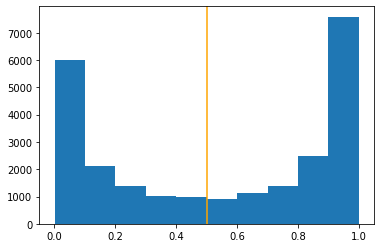

In [12]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [13]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'87.64'